In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import random as rn
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve,auc
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap


In [20]:
dataset= pd.read_csv('diabetes.csv')


In [21]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [23]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [24]:
dataset.skew()

Pregnancies                 0.982366
Glucose                     0.158806
BloodPressure              -1.854476
SkinThickness               0.207228
Insulin                     1.996084
BMI                        -0.090455
DiabetesPedigreeFunction    1.811979
Age                         1.181267
Outcome                     0.666633
dtype: float64

In [25]:
dataset_copy = dataset.copy()

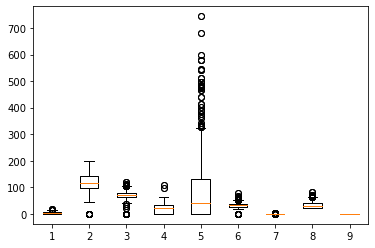

In [26]:
plt.boxplot(dataset_copy)
plt.show()

In [27]:
#1
print(dataset_copy['Pregnancies'].skew())
Q1=dataset_copy['Pregnancies'].quantile(0.25)
Q3=dataset_copy['Pregnancies'].quantile(0.75)
IQR=Q3-Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR

dataset_copy['Pregnancies'] = np.where(dataset_copy['Pregnancies'] <Min, 0.0,dataset_copy['Pregnancies'])
dataset_copy['Pregnancies'] = np.where(dataset_copy['Pregnancies'] >Max, 9.0,dataset_copy['Pregnancies'])
print(dataset_copy['Pregnancies'].skew())
#2
print(dataset_copy['Glucose'].skew())
Q1=dataset_copy['Glucose'].quantile(0.25)
Q3=dataset_copy['Glucose'].quantile(0.75)
IQR=Q3-Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR

dataset_copy['Glucose'] = np.where(dataset_copy['Glucose'] <Min, 85.0,dataset_copy['Glucose'])
dataset_copy['Glucose'] = np.where(dataset_copy['Glucose'] >Max, 168.0,dataset_copy['Glucose'])
print(dataset_copy['Glucose'].skew())
#3
print(dataset_copy['BloodPressure'].skew())
Q1=dataset_copy['BloodPressure'].quantile(0.25)
Q3=dataset_copy['BloodPressure'].quantile(0.75)
IQR=Q3-Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR

dataset_copy['BloodPressure'] = np.where(dataset_copy['BloodPressure'] <Min, 54.0,dataset_copy['BloodPressure'])
dataset_copy['BloodPressure'] = np.where(dataset_copy['BloodPressure'] >Max, 88.0,dataset_copy['BloodPressure'])
print(dataset_copy['BloodPressure'].skew())

#4
print(dataset_copy['SkinThickness'].skew())
Q1=dataset_copy['SkinThickness'].quantile(0.25)
Q3=dataset_copy['SkinThickness'].quantile(0.75)
IQR=Q3-Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR

dataset_copy['SkinThickness'] = np.where(dataset_copy['SkinThickness'] <Min, 0.0,dataset_copy['SkinThickness'])
dataset_copy['SkinThickness'] = np.where(dataset_copy['SkinThickness'] >Max, 40.0,dataset_copy['SkinThickness'])
print(dataset_copy['SkinThickness'].skew())

#5
print(dataset_copy['Insulin'].skew())
Q1=dataset_copy['Insulin'].quantile(0.25)
Q3=dataset_copy['Insulin'].quantile(0.75)
IQR=Q3-Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR

dataset_copy['Insulin'] = np.where(dataset_copy['Insulin'] <Min, 0.0,dataset_copy['Insulin'])
dataset_copy['Insulin'] = np.where(dataset_copy['Insulin'] >Max, 210.0,dataset_copy['Insulin'])
print(dataset_copy['Insulin'].skew())

#6
print(dataset_copy['BMI'].skew())
Q1=dataset_copy['BMI'].quantile(0.25)
Q3=dataset_copy['BMI'].quantile(0.75)
IQR=Q3-Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR

dataset_copy['BMI'] = np.where(dataset_copy['BMI'] <Min, 23.7,dataset_copy['BMI'])
dataset_copy['BMI'] = np.where(dataset_copy['BMI'] >Max, 42.1,dataset_copy['BMI'])
print(dataset_copy['BMI'].skew())

#7
print(dataset_copy['DiabetesPedigreeFunction'].skew())
Q1=dataset_copy['DiabetesPedigreeFunction'].quantile(0.25)
Q3=dataset_copy['DiabetesPedigreeFunction'].quantile(0.75)
IQR=Q3-Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR

dataset_copy['DiabetesPedigreeFunction'] = np.where(dataset_copy['DiabetesPedigreeFunction'] <Min, 0.164,dataset_copy['DiabetesPedigreeFunction'])
dataset_copy['DiabetesPedigreeFunction'] = np.where(dataset_copy['DiabetesPedigreeFunction'] >Max, 0.8782000000000003,dataset_copy['DiabetesPedigreeFunction'])
print(dataset_copy['DiabetesPedigreeFunction'].skew())

#8
print(dataset_copy['Age'].skew())
Q1=dataset_copy['Age'].quantile(0.25)
Q3=dataset_copy['Age'].quantile(0.75)
IQR=Q3-Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR

dataset_copy['Age'] = np.where(dataset_copy['Age'] <Min, 22.0,dataset_copy['Age'])
dataset_copy['Age'] = np.where(dataset_copy['Age'] >Max, 50.0,dataset_copy['Age'])
print(dataset_copy['Age'].skew())


0.9823655943266296
0.8637954310410373
0.15880587249920794
0.5178972697747213
-1.854476017469468
0.03955940343445571
0.2072281255594378
-0.05430300701069365
1.9960843556489325
0.9390987636753445
-0.09045533680555248
0.2616272208057226
1.8119788941444446
0.8143904018124094
1.1812672229549614
0.9065001103172357


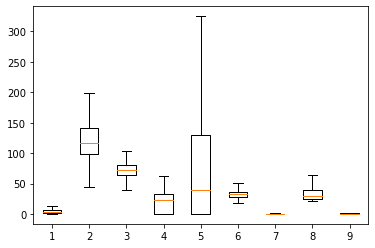

In [28]:
plt.boxplot(dataset_copy)
plt.show()

In [29]:
col_names = list(dataset_copy.columns)
mm_scaler = preprocessing.MinMaxScaler()
dataset_copy = mm_scaler.fit_transform(dataset_copy)
dataset_copy= pd.DataFrame(dataset_copy, columns=col_names)

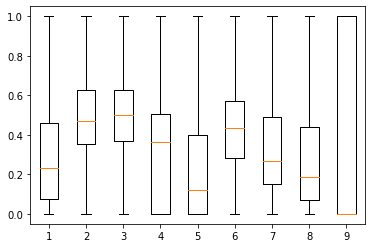

In [30]:
plt.boxplot(dataset_copy)
plt.show()

accuracy: 80.75
MAE: 0.1925
MSE: 0.1925
RMSE: 0.4387482


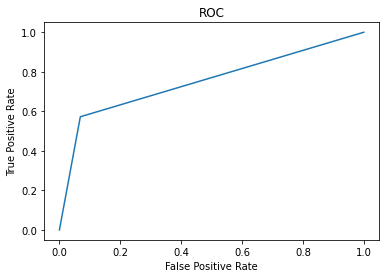

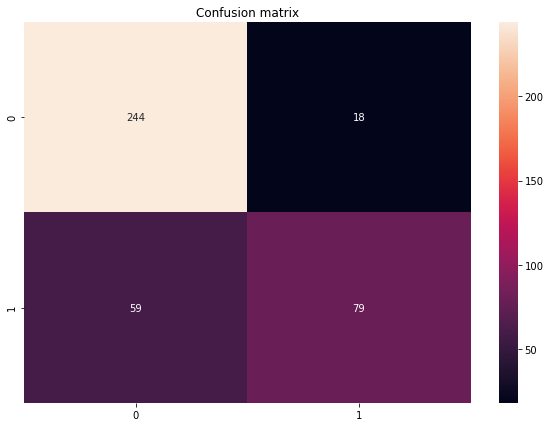

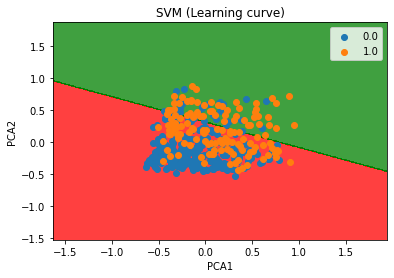

In [31]:
#Scaling data
dataset_copy=dataset_copy.astype('float32')
scaler=MinMaxScaler()
dataset_copy=scaler.fit_transform(dataset_copy)

#split data
X_train=dataset_copy[0:1600,0:8]
Y_train=dataset_copy[0:1600,8]

X_test=dataset_copy[1600:,0:8]
Y_test=dataset_copy[1600:,8]


# an initial SVM model with linear kernel   
model = svm.SVC(C=2, kernel='linear')
history=model.fit(X_train, Y_train)
prediction = model.predict(X_test)
print('accuracy:',metrics.accuracy_score(prediction, Y_test) * 100)
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

#roc curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(Y_test, prediction)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

#confusion matrix curve
confusion = metrics.confusion_matrix(y_true = Y_test, y_pred = prediction)
df_cm = pd.DataFrame(confusion, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
plt.title("Confusion matrix")
plt.ylabel('Real Values')
plt.xlabel('Predicted Values')
sns.heatmap(df_cm, annot=True,fmt='d')
plt.show()

#applying PCA
pca = PCA(n_components =2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance = pca.explained_variance_ratio_
history2=model.fit(X_train, Y_train)
prediction = model.predict(X_test)
# Visualising the Test set results

X_set, y_set =X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], cmap = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Learning curve)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()
